# Importing libraries

In [2]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

# Read data

In [3]:
af = 'vv'

# df__train = pd.read_csv(f'data/tr.{af}1.csv')
# df__test = pd.read_csv(f'./data/t.{af}1.csv')
df = pd.read_csv(f'./data/v.{af}1.csv', index_col=[0])

In [4]:
df.loc[df['Label'] != 5, 'LabelBin'] = 0
df.loc[df['Label'] == 5, 'LabelBin'] = 1

In [5]:
df.columns

Index(['StreamID', 'StartTime', 'Dur', 'Proto', 'SrcAddr', 'Sport', 'Dir',
       'DstAddr', 'Dport', 'State', 'sTos', 'dTos', 'TotPkts', 'TotBytes',
       'SrcBytes', 'Label', 'LabelStr', 'PktsPerSec', 'BytesPerSec',
       'SrcBytesPerSec', 'BytesPerPkt', 'DstBytes', 'DstBytesPerSec', 'Dir_0',
       'Dir_1', 'Dir_2', 'Dir_3', 'Dir_4', 'Dir_5', 'Dir_6', 'sTos_0',
       'sTos_2', 'sTos_3', 'sTos_1', 'sTos_-1', 'dTos_0', 'dTos_-1', 'dTos_3',
       'dTos_2', 'dTos_1', 'State_orig', 'State_CON', 'State_alltcp',
       'State_INT', 'State_S_', 'State_URP', 'State_ECO', 'State_RED',
       'State_REQ', 'State_ECR', 'State_URH', 'State_TXD', 'State_URFIL',
       'State_R_', 'State_URN', 'State_RSP', 'State_URHPRO', 'State_A_',
       'State_other', 'Flag_nan', 'Flag_S', 'Flag_A', 'Flag_P', 'Flag_R',
       'Flag_F', 'Proto_udp', 'Proto_tcp', 'Proto_icmp', 'Proto_rtp',
       'Proto_rtcp', 'Proto_igmp', 'Proto_arp', 'Proto_other', 'Service',
       'Service_80', 'Service_443', 'Service_2

# MI on numeric features (not one-hot features)

In [5]:
num_fts = [
       'Dur', 
       'Sport', 'Dport', 
       'sTos', 'dTos', 
       'TotPkts', 'TotBytes', 'SrcBytes', 
       'PktsPerSec', 'BytesPerSec', 'SrcBytesPerSec', 'BytesPerPkt', 
       'DstBytes', 'DstBytesPerSec', 
       # 'sTos_0', 'sTos_2', 'sTos_3', 'sTos_1', 'sTos_-1', 
       # 'dTos_0', 'dTos_-1', 'dTos_3', 'dTos_2', 'dTos_1', 
       # 'State_CON', 'State_alltcp',
       # 'State_INT', 'State_S_', 'State_URP', 'State_ECO', 'State_RED',
       # 'State_REQ', 'State_ECR', 'State_URH', 'State_TXD', 'State_URFIL',
       # 'State_R_', 'State_URN', 'State_RSP', 'State_URHPRO', 'State_A_',
       # 'State_other', 
       # 'Flag_nan', 'Flag_S', 'Flag_A', 'Flag_P', 'Flag_R',
       # 'Flag_F', 
       # 'Proto_udp', 'Proto_tcp', 'Proto_icmp', 'Proto_rtp',
       # 'Proto_rtcp', 'Proto_igmp', 'Proto_arp', 'Proto_other', 
       # 'Service_80', 'Service_443', 'Service_21', 'Service_22', 'Service_25',
       # 'Service_6667', 'Service_other'
]

In [6]:
X_num = df[num_fts].values
y = df['LabelBin'].values

In [7]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

#? find best features
fs = SelectKBest(score_func=f_classif, k='all')
ft_model = fs.fit(X_num, y)

df_fts_scores = pd.DataFrame(ft_model.scores_)
df_fts_names = pd.DataFrame(num_fts)

df_fts_1 = pd.concat([df_fts_names, df_fts_scores], axis=1)
df_fts_1.columns = ['Ft', 'Score']
print(df_fts_1.nlargest(20, 'Score'))

                Ft         Score
4             dTos  88859.653951
1            Sport  37461.567496
11     BytesPerPkt   3304.314082
0              Dur   2072.371795
9      BytesPerSec   1888.203135
13  DstBytesPerSec   1419.189073
8       PktsPerSec   1334.168626
10  SrcBytesPerSec   1038.303990
6         TotBytes      3.168939
12        DstBytes      3.043267
5          TotPkts      2.819844
2            Dport      1.474629
7         SrcBytes      0.412044
3             sTos      0.012200


In [8]:
"','".join(df_fts_1.nlargest(20, 'Score')['Ft'])

"dTos','Sport','BytesPerPkt','Dur','BytesPerSec','DstBytesPerSec','PktsPerSec','SrcBytesPerSec','TotBytes','DstBytes','TotPkts','Dport','SrcBytes','sTos"

<AxesSubplot:xlabel='Ft'>

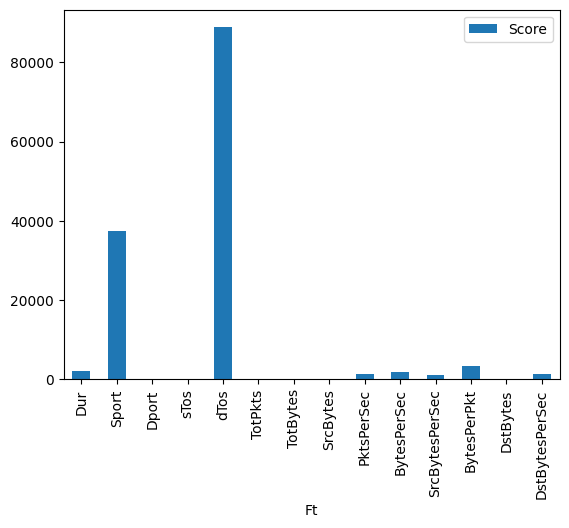

In [9]:
df_fts_1.set_index('Ft', drop=True, inplace=True)
df_fts_1.plot.bar()

# MI on all features (including one-hot fields)

In [10]:
all_fts = [
       'Dur', 
       'Sport', 'Dport', 
       'sTos', 'dTos', 
       'TotPkts', 'TotBytes', 'SrcBytes', 
       'PktsPerSec', 'BytesPerSec', 'SrcBytesPerSec', 'BytesPerPkt', 
       'DstBytes', 'DstBytesPerSec', 
       # 'sTos_0', 'sTos_2', 'sTos_3', 'sTos_1', 'sTos_-1', 
       # 'dTos_0', 'dTos_-1', 'dTos_3', 'dTos_2', 'dTos_1', 
       'State_CON', 'State_alltcp',
       'State_INT', 'State_S_', 'State_URP', 'State_ECO', 'State_RED',
       'State_REQ', 'State_ECR', 'State_URH', 'State_TXD', 'State_URFIL',
       'State_R_', 'State_URN', 'State_RSP', 'State_URHPRO', 'State_A_',
       'State_other', 
       'Flag_nan', 'Flag_S', 'Flag_A', 'Flag_P', 'Flag_R',
       'Flag_F', 
       'Proto_udp', 'Proto_tcp', 'Proto_icmp', 'Proto_rtp',
       'Proto_rtcp', 'Proto_igmp', 'Proto_arp', 'Proto_other', 
       'Service_80', 'Service_443', 'Service_21', 'Service_22', 'Service_25',
       'Service_6667', 'Service_other',
       'Dir_0', 'Dir_1', 'Dir_2', 'Dir_3', 'Dir_4', 'Dir_5', 'Dir_6'
]

In [11]:
X_num = df[all_fts].values
y = df['LabelBin'].values

In [21]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

#? find best features
fs = SelectKBest(score_func=f_classif, k='all')
ft_model = fs.fit(X_num, y)

df_fts_scores = pd.DataFrame(ft_model.scores_)
df_fts_names = pd.DataFrame(all_fts)

df_fts_2 = pd.concat([df_fts_names, df_fts_scores], axis=1)
df_fts_2.columns = ['Ft', 'Score']
print(df_fts_2.nlargest(30, 'Score'))

                Ft          Score
17        State_S_  600206.490796
4             dTos   88859.653951
39       Proto_tcp   69577.710759
38       Proto_udp   61868.289978
46      Service_80   60875.308540
52   Service_other   57804.403777
58           Dir_5   49767.586259
53           Dir_0   49369.056296
14       State_CON   49324.240597
50      Service_25   43529.128938
1            Sport   37461.567496
33          Flag_S   24338.048347
36          Flag_R    3814.990981
11     BytesPerPkt    3304.314082
0              Dur    2072.371795
51    Service_6667    2037.963675
9      BytesPerSec    1888.203135
15    State_alltcp    1705.498210
13  DstBytesPerSec    1419.189073
34          Flag_A    1363.198712
8       PktsPerSec    1334.168626
10  SrcBytesPerSec    1038.303990
37          Flag_F     723.457162
35          Flag_P     507.754076
16       State_INT     392.051414
40      Proto_icmp     131.584126
18       State_URP      79.250926
49      Service_22      75.394827
54           D

In [22]:
"','".join(df_fts_2.nlargest(30, 'Score')['Ft'])

"State_S_','dTos','Proto_tcp','Proto_udp','Service_80','Service_other','Dir_5','Dir_0','State_CON','Service_25','Sport','Flag_S','Flag_R','BytesPerPkt','Dur','Service_6667','BytesPerSec','State_alltcp','DstBytesPerSec','Flag_A','PktsPerSec','SrcBytesPerSec','Flag_F','Flag_P','State_INT','Proto_icmp','State_URP','Service_22','Dir_1','Service_443"

<AxesSubplot:xlabel='Ft'>

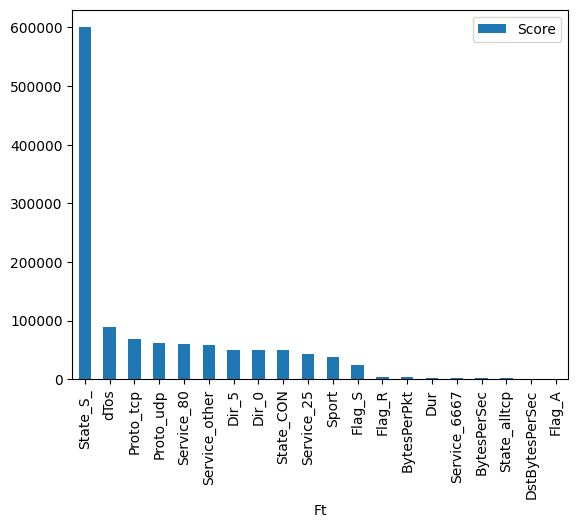

In [14]:
# df_fts_2.loc[df_fts_2['Score'] > 1038]
df_fts_2_ = pd.DataFrame(df_fts_2.nlargest(20, 'Score'))
df_fts_2_.set_index('Ft', drop=True, inplace=True)
df_fts_2_.plot.bar()

# MI on one-hot fields

In [6]:
ohe_fts = [
       # 'sTos_0', 'sTos_2', 'sTos_3', 'sTos_1', 'sTos_-1', 
       # 'dTos_0', 'dTos_-1', 'dTos_3', 'dTos_2', 'dTos_1', 
       'State_CON', 'State_alltcp',
       'State_INT', 'State_S_', 'State_URP', 'State_ECO', 'State_RED',
       'State_REQ', 'State_ECR', 'State_URH', 'State_TXD', 'State_URFIL',
       'State_R_', 'State_URN', 'State_RSP', 'State_URHPRO', 'State_A_',
       'State_other', 
       'Flag_nan', 'Flag_S', 'Flag_A', 'Flag_P', 'Flag_R',
       'Flag_F', 
       'Proto_udp', 'Proto_tcp', 'Proto_icmp', 'Proto_rtp',
       'Proto_rtcp', 'Proto_igmp', 'Proto_arp', 'Proto_other', 
       'Service_80', 'Service_443', 'Service_21', 'Service_22', 'Service_25',
       'Service_6667', 'Service_other',
       'Dir_0', 'Dir_1', 'Dir_2', 'Dir_3', 'Dir_4', 'Dir_5', 'Dir_6'
]

In [7]:
X_num = df[ohe_fts].values
y = df['LabelBin'].values

In [9]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

#? find best features
fs = SelectKBest(score_func=f_classif, k='all')
ft_model = fs.fit(X_num, y)

df_fts_scores = pd.DataFrame(ft_model.scores_)
df_fts_names = pd.DataFrame(ohe_fts)

df_fts_3 = pd.concat([df_fts_names, df_fts_scores], axis=1)
df_fts_3.columns = ['Ft', 'Score']
print(df_fts_3.nlargest(30, 'Score'))

               Ft          Score
3        State_S_  600206.490796
25      Proto_tcp   69577.710759
24      Proto_udp   61868.289978
32     Service_80   60875.308540
38  Service_other   57804.403777
44          Dir_5   49767.586259
39          Dir_0   49369.056296
0       State_CON   49324.240597
36     Service_25   43529.128938
19         Flag_S   24338.048347
22         Flag_R    3814.990981
37   Service_6667    2037.963675
1    State_alltcp    1705.498210
20         Flag_A    1363.198712
23         Flag_F     723.457162
21         Flag_P     507.754076
2       State_INT     392.051414
26     Proto_icmp     131.584126
4       State_URP      79.250926
35     Service_22      75.394827
40          Dir_1      71.386587
33    Service_443      56.026688
41          Dir_2      55.659035
9       State_URH      17.200742
42          Dir_3      15.576413
27      Proto_rtp      14.703142
6       State_RED      10.706170
28     Proto_rtcp       9.328546
5       State_ECO       8.088967
8       St

In [10]:
"','".join(df_fts_3.nlargest(30, 'Score')['Ft'])

"State_S_','Proto_tcp','Proto_udp','Service_80','Service_other','Dir_5','Dir_0','State_CON','Service_25','Flag_S','Flag_R','Service_6667','State_alltcp','Flag_A','Flag_F','Flag_P','State_INT','Proto_icmp','State_URP','Service_22','Dir_1','Service_443','Dir_2','State_URH','Dir_3','Proto_rtp','State_RED','Proto_rtcp','State_ECO','State_ECR"

<AxesSubplot:xlabel='Ft'>

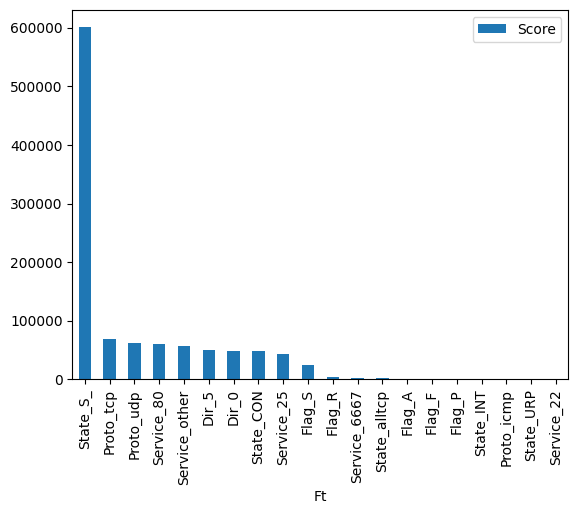

In [11]:
# df_fts_2.loc[df_fts_2['Score'] > 1038]
df_fts_3_ = pd.DataFrame(df_fts_3.nlargest(20, 'Score'))
df_fts_3_.set_index('Ft', drop=True, inplace=True)
df_fts_3_.plot.bar()

# Chi2

In [15]:
str_fts = ['Dir','Proto','State']

In [ ]:
X_str = df[str_fts].values
y = df['LabelBin'].values

In [ ]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2

# #? find best features
# fs = SelectKBest(score_func=chi2)
# ft_model = fs.fit(X_str, y)

# df_fts_scores = pd.DataFrame(ft_model.scores_)
# df_fts_names = pd.DataFrame(num_fts)

# df_fts = pd.concat([df_fts_names, df_fts_scores], axis=1)
# df_fts.columns = ['Ft', 'Score']
# print(df_fts.nlargest(20, 'Score'))

In [ ]:
# for ft in str_fts:
#     crosstab = pd.crosstab(df[ft].values, df['LabelBin'].values)
#     print('\n-------------------')
#     print(ft)
#     display(crosstab)
#     display(stats.chi2_contingency(crosstab, correction=True)[:-1])